In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, misc
from scipy.fft import fft, fftfreq

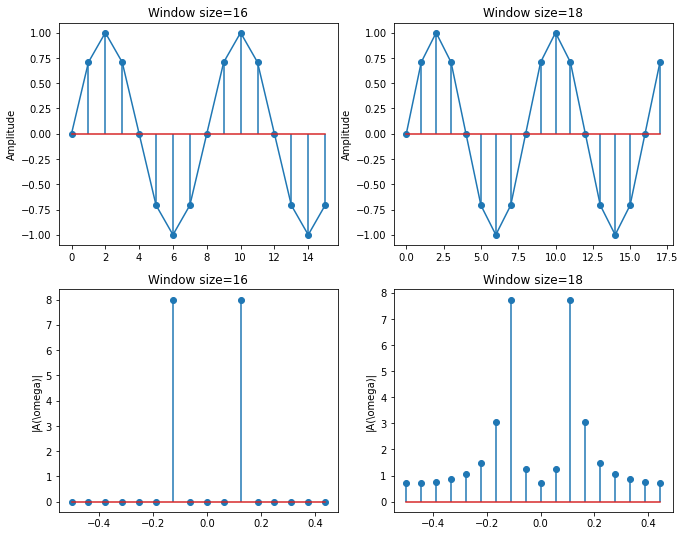

In [3]:
F = 1 #Hz
N=8
cycles=4
L1=16
L2=18
window_1=np.ones((1,L1))
window_2=np.ones((1,L2))

time = np.arange(0, cycles*N,1)
amp=np.sin((2*np.pi*F)*time/N)

fft_1 = fft(amp[0:L1])
fft_2 = fft(amp[0:L2])
xf_1 = fftfreq(amp[0:L1].shape[0], 1 / F)
xf_2 = fftfreq(amp[0:L2].shape[0], 1 / F)

plt.figure(figsize=[11, 9])

plt.subplot(2, 2, 1)
plt.plot(time[0:L1], amp[0:L1])
plt.stem(time[0:L1], amp[0:L1])
plt.title('Window size=16')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(time[0:L2], amp[0:L2])
plt.stem(time[0:L2], amp[0:L2])
plt.title('Window size=18')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.stem(xf_1,np.abs(fft_1))
plt.title('Window size=16')
plt.ylabel('|A(\omega)|')

plt.subplot(2, 2, 4)
plt.stem(xf_2,np.abs(fft_2))
plt.title('Window size=18')
plt.ylabel('|A(\omega)|')

plt.show()






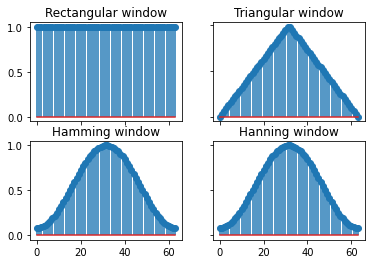

In [4]:
#Windows functions
def win_funcs(win_name,Nw):
    n=np.arange(Nw)
    w=np.zeros((Nw,1))    
    if win_name=='w_rect':
        w=np.ones((Nw,1))
    if win_name=='w_tr':
        w=1-abs((2*n-Nw+1))/(Nw-1)
    if win_name=='w_hamm':
        w=0.54 -0.46*np.cos(2*np.pi*n/(Nw-1))
    if win_name=='w_hann':
        w=0.5-0.5*np.cos(2*np.pi*n/(Nw-1))
    return w 
Nw=64
n=np.arange(Nw)    
fig,axs=plt.subplots(2,2)

w_rect=np.ones((Nw,1))
axs[0, 0].stem(w_rect)
axs[0, 0].set_title('Rectangular window')

w_tr=1-abs((2*n-Nw+1))/(Nw-1)
axs[0, 1].stem(w_tr)
axs[0, 1].set_title('Triangular window')

w_hamm=0.54 -0.46*np.cos(2*np.pi*n/(Nw-1))
axs[1, 0].stem(w_hamm)
axs[1, 0].set_title('Hamming window')

w_hann=0.54 -0.46*np.cos(2*np.pi*n/(Nw-1))
axs[1, 1].stem(w_hann)
axs[1, 1].set_title('Hanning window')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



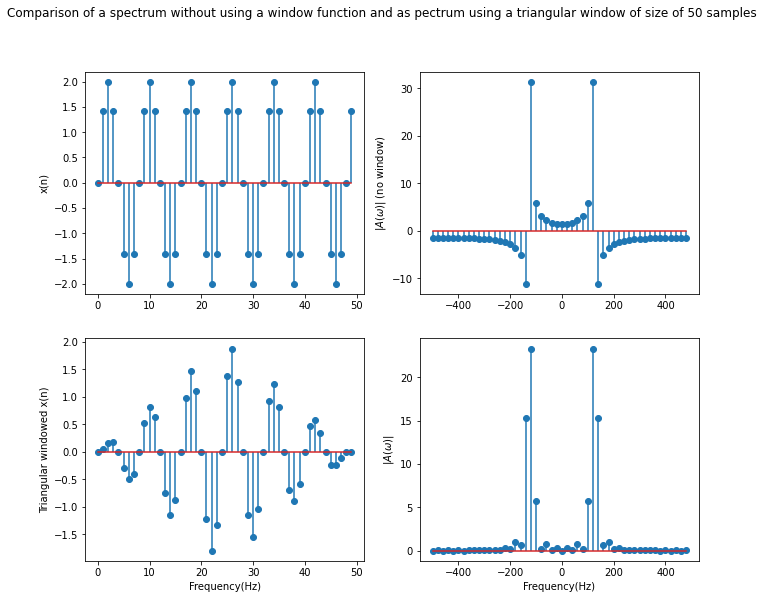

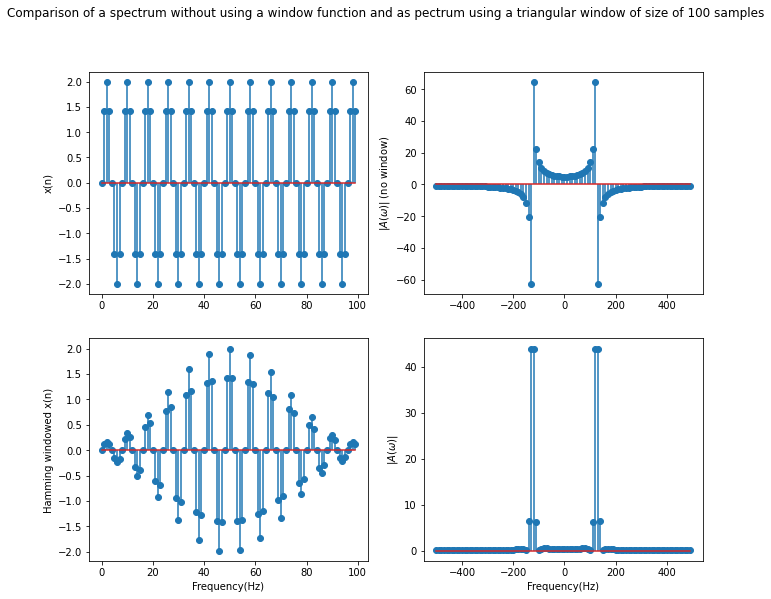

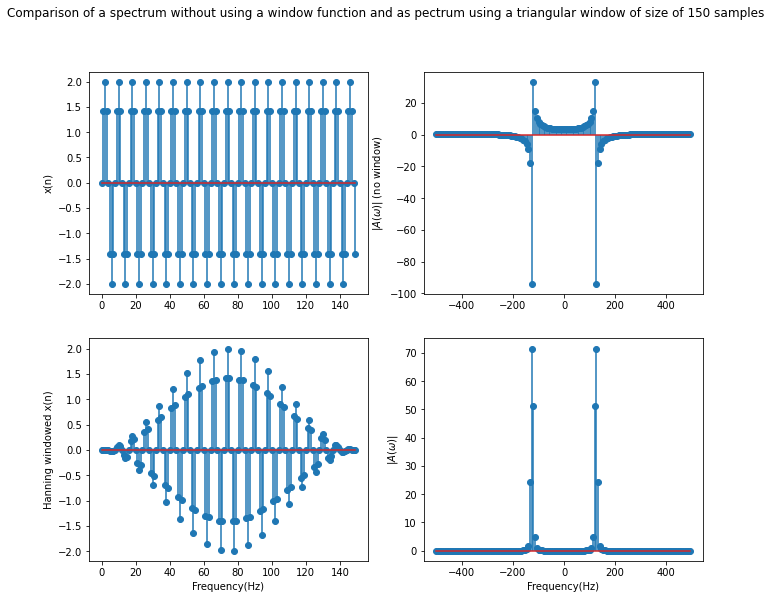

In [23]:
F = 1000 #Hz
Fs=8000 #points per period
L=200
L1=50
L2=100
L3=150
window_1=win_funcs('w_tr',L1)
window_2=win_funcs('w_hamm',L2)
window_3=win_funcs('w_hann',L3)

time = np.arange(0,L,1)
amp=2*np.sin((2*np.pi*F)*time/Fs)

fft_1 = fft(amp[0:L1]*window_1)
fft_2 = fft(amp[0:L2]*window_2)
fft_3 = fft(amp[0:L3]*window_3)

xf_1 = fftfreq(fft_1.shape[0], 1 / F)
xf_2 = fftfreq(fft_2.shape[0], 1 / F)
xf_3 = fftfreq(fft_3.shape[0], 1 / F)

def plot_windowed(time,amp,L1,window,window_name,fft_1,xf_1):
    #Plot windowed signal amp with different types of window specified by window_name (triangula, hamming, and hanning)
    fig=plt.figure(figsize=[11, 9])
    plt.subplot(2, 2, 1)
    plt.stem(time[0:L1], amp[0:L1])
    plt.ylabel('x(n)')

    plt.subplot(2, 2, 2)
    plt.stem(xf_1,fft(amp[0:L1]))
    plt.ylabel('$|A(\omega)|$ (no window)')

    plt.subplot(2, 2, 3)
    plt.stem(amp[0:L1]*window)
    plt.xlabel('Frequency(Hz)')
    plt.ylabel(window_name+'windowed x(n)')

    plt.subplot(2, 2, 4)
    plt.stem(xf_1,np.abs(fft_1))
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('$|A(\omega)|$')
    fig.suptitle('Comparison of a spectrum without using a window function and as pectrum using a triangular window of size of '+str(L1)+' samples')
    plt.show()

plot_windowed(time,amp,L1,window_1,'Triangular ',fft_1,xf_1)
plot_windowed(time,amp,L2,window_2,'Hamming ',fft_2,xf_2)
plot_windowed(time,amp,L3,window_3,'Hanning ',fft_3,xf_3)


